In [101]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

#split data
from sklearn.model_selection import train_test_split

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm  

In [135]:
housing = pd.DataFrame(pd.read_csv("Housing_data_final.csv"))

In [136]:
# Check the head of the dataset
housing.head()

,price,area,bedrooms,bathrooms,washingmachine,dtcenter,dtrec,dthospital,hotwater,ac,furnish,parking,security
0,6447368,100,1,2,1,1.238920,0.307354,0.578929,1,1,1,1,1
1,5710526,75,1,2,1,1.235416,0.131664,0.385726,1,1,1,1,2
2,5157895,58,1,2,1,1.135016,0.371314,0.775536,1,1,0,1,2
3,5157895,132,1,1,1,1.215055,0.499058,0.233979,1,1,2,1,0
4,4863158,78,1,1,1,0.508271,0.503129,1.064498,1,1,1,1,1


In [137]:
housing.shape

(545, 13)

In [138]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           545 non-null    int64  
 1   area            545 non-null    int64  
 2   bedrooms        545 non-null    int64  
 3   bathrooms       545 non-null    int64  
 4   washingmachine  545 non-null    int64  
 5   dtcenter        545 non-null    float64
 6   dtrec           545 non-null    float64
 7   dthospital      545 non-null    float64
 8   hotwater        545 non-null    int64  
 9   ac              545 non-null    int64  
 10  furnish         545 non-null    int64  
 11  parking         545 non-null    int64  
 12  security        545 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 55.5 KB


In [139]:
# outlier treatment for price
Q1 = housing.price.quantile(0.15)
Q3 = housing.price.quantile(0.85)
IQR = Q3 - Q1
#housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]

In [140]:
# outlier treatment for area
Q1 = housing.area.quantile(0.15)
Q3 = housing.area.quantile(0.85)
IQR = Q3 - Q1
#housing = housing[(housing.area >= Q1 - 1.5*IQR) & (housing.area <= Q3 + 1.5*IQR)]

In [141]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [142]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [143]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'washingmachine', 'dtcenter', 'dtrec','dthospital', 'hotwater', 'ac', 'furnish', 'parking', 'security']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [144]:
y_train = df_train.pop('price')
X_train = df_train

In [145]:
lm = LinearRegression()
lm.fit(X_train, y_train)

print(lm.intercept_)
print(lm.coef_)

0.17580342358841325
[ 0.296664    0.03777617  0.13669332  0.01367207 -0.33882379  0.01869204
 -0.0350562   0.01848231  0.02038838  0.01032112  0.09683421  0.02076868]


In [146]:
lm = sm.OLS(y_train,X_train).fit()   # Running the linear model

In [147]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2, include_bias=True)
xp = polynomial_features.fit_transform(X_train)
xp.shape

model_2 = sm.OLS(y_train, xp).fit()

print(model_2.params)

const    0.497892
x1      -0.384497
x2      -0.153595
x3      -0.736540
x4      -0.024571
           ...   
x86     -0.008968
x87      0.034700
x88     -0.111058
x89      0.067731
x90     -0.027134
Length: 91, dtype: float64


In [148]:
#Let's see the summary of our linear model\
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                              573.3
Date:                Tue, 28 Nov 2023   Prob (F-statistic):                   3.71e-230
Time:                        11:10:08   Log-Likelihood:                          468.06
No. Observations:                 381   AIC:                                     -912.1
Df Residuals:                     369   BIC:                                     -864.8
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [149]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     38.97
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          1.04e-120
Time:                        11:10:09   Log-Likelihood:                 625.34
No. Observations:                 381   AIC:                            -1075.
Df Residuals:                     293   BIC:                            -727.7
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4979      0.319      1.562      0.1

In [150]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [151]:
num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'washingmachine', 'dtcenter', 'dtrec','dthospital', 'hotwater', 'ac', 'furnish', 'parking', 'security']

In [152]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [153]:
y_test = df_test.pop('price')
X_test = df_test

In [154]:
# Adding constant variable to test dataframe
#X_test = sm.add_constant(X_test)

In [155]:
def predict_prices_with_polynomial_model(model, polynomial_features, feature_names, new_data_dict_list):
    predictions = []

    for new_data_dict in new_data_dict_list:
        # Extract features from the dictionary
        new_data = [[new_data_dict[feature] for feature in feature_names]]

        # Transform the new input features using PolynomialFeatures
        new_data_transformed = polynomial_features.transform(new_data)

        # Make predictions using the trained model
        prediction = model.predict(new_data_transformed)
        predictions.append(prediction[0])

    return predictions

# Example usage:
new_data_dict_list = [
    {'area': 120, 'bedrooms': 3, 'bathrooms': 2, 'washingmachine': 1, 'dtcenter': 5, 'dtrec': 10,
     'dthospital': 3, 'hotwater': 1, 'ac': 1, 'furnish': 2, 'parking': 1, 'security': 1},
    # Add more dictionaries for additional instances
]   

predictions = predict_prices_with_polynomial_model(model_2, polynomial_features, num_vars[1:], new_data_dict_list)
print("Predicted Prices:", predictions)


Predicted Prices: [4151.713185416549]


In [156]:
xtt = polynomial_features.fit_transform(X_test)
y_pred_2 = model_2.predict(xtt) 

In [157]:
# Making predictions
y_pred = lm.predict(X_test)

In [158]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.7086689704077824

In [159]:
r2_score(y_test,y_pred_2)

0.7479261981173886

Text(0, 0.5, 'y_pred')

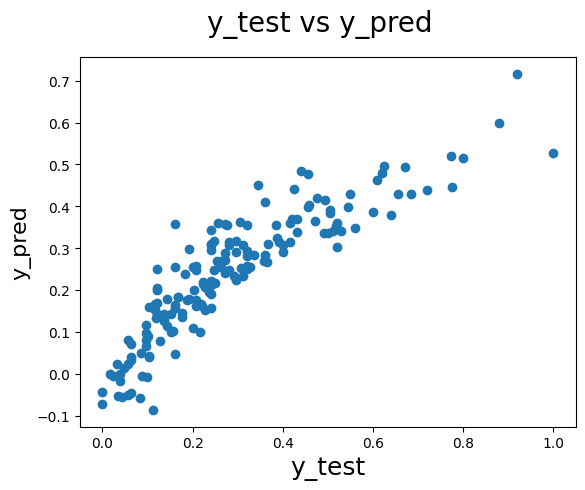

In [160]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0, 0.5, 'y_pred_2')

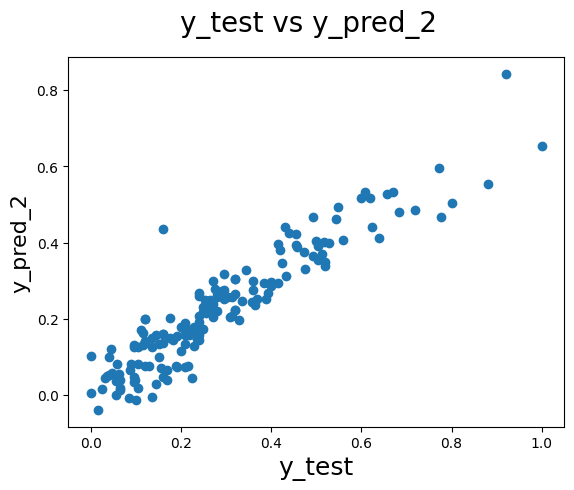

In [161]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_2)
fig.suptitle('y_test vs y_pred_2', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred_2', fontsize=16)                          # Y-label